# The project involves stock prediction based on some random stock data. In this project I try to predict the  stock value. for this purpose I use two bidirectional LSTM layers

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split



In [31]:
df = pd.read_csv('stockdata.csv', index_col='Date', parse_dates=True)
df.index.freq = 'D'


print(len(df))


298


In [32]:
df.head()

,IBM
Date,
03-01-2007,80.517962
04-01-2007,81.378851
05-01-2007,80.642129
08-01-2007,81.867244
09-01-2007,82.835742


###Scaling the data

In [33]:
train = df.iloc[:275]
test = df.iloc[275:]

scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


Training the data with two bidirectional LSTM layers. A dropout layer is added to avoid over fitting

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_5 (Bidirectional)      │ (None, 12, 200)             │          81,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 200)                 │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,601 (1.23 MB)

 Trainable params: 322,601 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
  7/263 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3252

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 0.0418
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0086
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.0081
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0074
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0052
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0051
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0048
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0059
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0051
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0039
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0056
Epoch 12/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0042
Epoch 13/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0039
Epoch 14/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0044
Epoch 15/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms

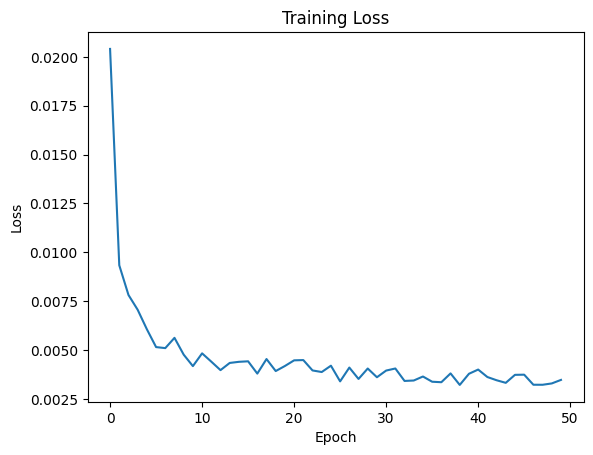

In [34]:

model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, activation='relu'), input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

model.fit(generator, epochs=50)

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Last n values from training data are used to predict the next value which is upended. Again the last n values are used to predict the next value and the predicted value is upended. This goes on till last value is predicted.


In [35]:
last_train_batch = scaled_train[-n_input:,0].reshape((1, n_input, n_features))


model.predict(last_train_batch)

test_predictions = []

first_eval_batch = scaled_train[-n_input:,0]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    print(current_pred.shape)
    print(current_pred)
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[scaled_test[i]]], axis=1)

true_predictions = scaler.inverse_transform(test_predictions)

test['Predictions'] = true_predictions




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
(1,)
[0.5121898]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1,)
[0.47062114]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
(1,)
[0.42834505]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(1,)
[0.44944522]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(1,)
[0.5054285]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
(1,)
[0.55326253]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
(1,)
[0.61342347]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(1,)
[0.56023234]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
(1,)
[0.5523304]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(1,)
[0.51605856]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
(1,)
[0.5858916]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1,)
[0.5711485]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
(1,)
[0.6020286]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1,)
[0.6662108]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
(1,)
[0.8033042]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
(1,)
[0.8762953]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1,)
[0.85965955]
1/1 ━━━━━━━━━━━━━━

<ipython-input-35-6e6f4bf2c0c9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


###Actual and predicted value is plotted. Root mean square error is calculated

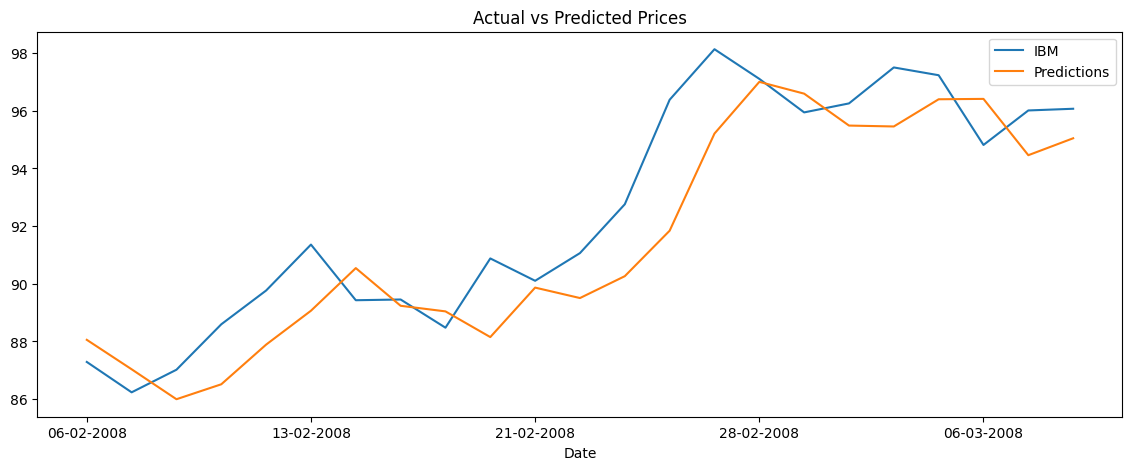

RMSE: 1.7964355889941324


In [37]:
test.plot(figsize=(14, 5))
plt.title('Actual vs Predicted Prices')
plt.show()

rmse = sqrt(mean_squared_error(test['IBM'], test['Predictions']))
print(f'RMSE: {rmse}')